In [5]:
import os
import numpy
from datetime import datetime, timedelta

In [2]:
# mapping
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as tck

def mapping_jp(v_data, f_title=''):
    plt.figure(figsize=(10,10))
    jp_extent = (120.0, 150.0, 22.5, 47.5)
    proj=ccrs.PlateCarree()
    ax=plt.axes(projection=proj)
    ax.set_extent(jp_extent,proj)
    ax.coastlines(resolution='10m')
    gl=ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = tck.FixedLocator(numpy.arange(120,150,5))
    gl.ylocator = tck.FixedLocator(numpy.arange(20,50,5))
    plt.imshow(v_data, extent=jp_extent, cmap='gist_ncar', interpolation='None')
    plt.colorbar()
    plt.title(f_title)
    plt.show()

In [3]:
# JP extent
resolution = 0.01 # degree
lats = numpy.arange(47.5-resolution/2, 22.5, -resolution)
lons = numpy.arange(120.+resolution/2, 150, resolution)

UTC_OFFSET = 9 # hour
time_internal = 10  # mins

In [ ]:
INPUT_FOLDER = '/data01/people/beichen/workspace/20231121'
area_localtime = '2018-07-19T13:00:00Z'

In [6]:
area_utc_time = datetime.strptime(area_localtime, "%Y-%m-%dT%H:%M:%SZ") - timedelta(hours=UTC_OFFSET)
area_year = area_utc_time.strftime("%Y")
area_month = area_utc_time.strftime("%m")
area_day = area_utc_time.strftime("%d")
area_hour = area_utc_time.strftime("%H")
area_min = area_utc_time.strftime("%M")

area_utc_year_1day = datetime.strptime(area_year + '-01-01T00:00:00Z', "%Y-%m-%dT%H:%M:%SZ")
time_from_1day = area_utc_time - area_utc_year_1day
area_doy = time_from_1day.days+1
area_doy_str = (3-len(str(area_doy)))*'0' + str(area_doy)

### Read input files

In [7]:
# Rnet
jp_r_net_filename = os.path.join(INPUT_FOLDER, area_utc_time.strftime("%Y%m%d%H%M") + '_input_jp_r_net.npy')
r_net_area = numpy.load(jp_r_net_filename)
# RH
jp_rh_filename = os.path.join(INPUT_FOLDER, area_utc_time.strftime("%Y%m%d%H%M") + '_input_jp_rh.npy')
rh_area = numpy.load(jp_rh_filename)
# Ta
jp_ta_filename = os.path.join(INPUT_FOLDER, area_utc_time.strftime("%Y%m%d%H%M") + '_input_jp_ta.npy')
ta_area = numpy.load(jp_ta_filename)
# NDVI
jp_ndvi_filename = os.path.join(INPUT_FOLDER, area_utc_time.strftime("%Y%m%d%H%M") + '_input_jp_ndvi.npy')
ndvi_area = numpy.load(jp_ndvi_filename)

/data01/people/beichen/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data01/people/beichen/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


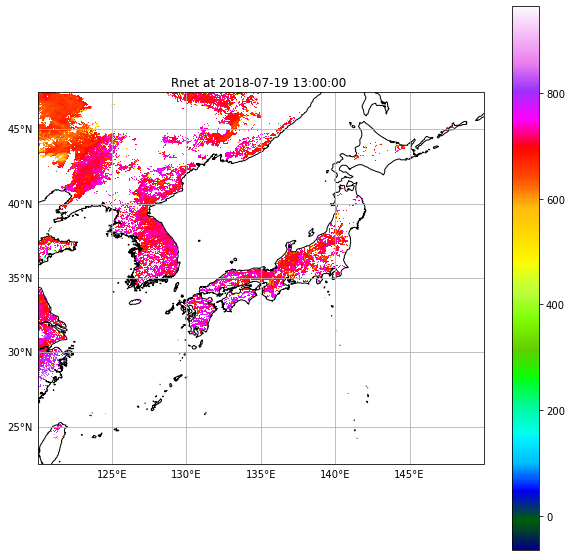

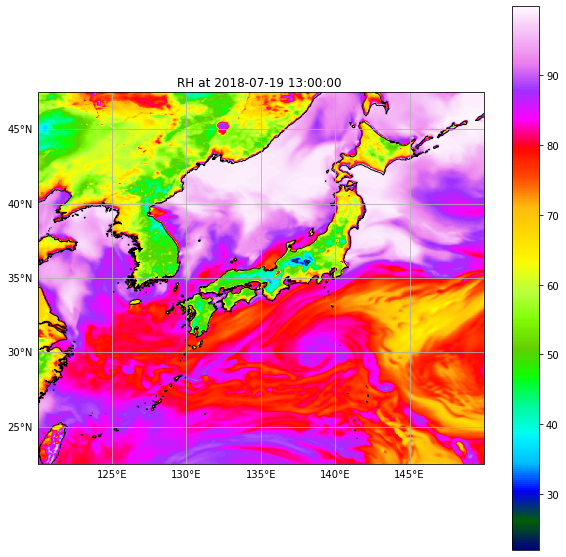

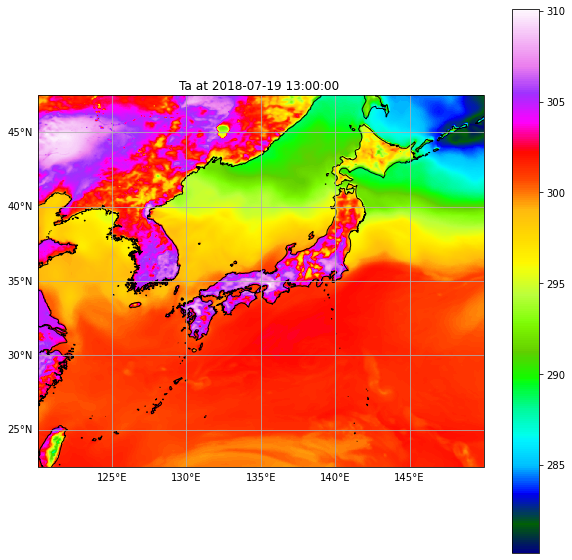

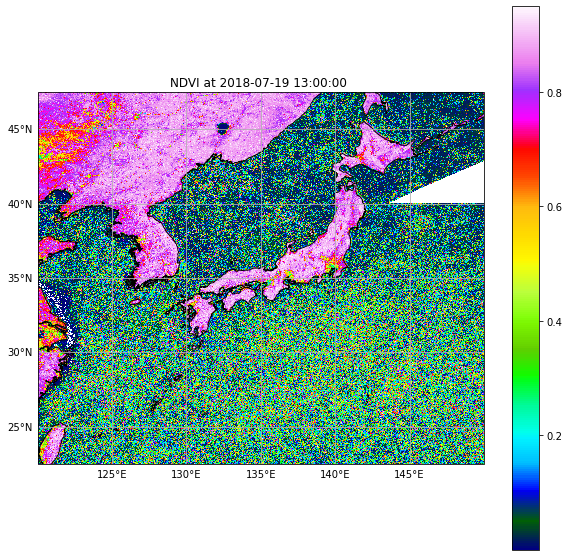

In [8]:
# mapping_jp(r_net_area, 'Rnet at ' + area_localtime.replace('T', ' ').replace('Z', ' '))
# mapping_jp(rh_area, 'RH at ' + area_localtime.replace('T', ' ').replace('Z', ' '))
# mapping_jp(ta_area, 'Ta at ' + area_localtime.replace('T', ' ').replace('Z', ' '))
# mapping_jp(ndvi_area, 'NDVI at ' + area_localtime.replace('T', ' ').replace('Z', ' '))

## Run PT-JPL model

In [9]:
from ptjpl_ecostress_area import *

In [10]:
et_array = ptjpl_area(r_net_area, rh_area, ta_area, ndvi_area)

calculating surface wetness values [%]
calculating vapor pressure deficit [kPa]
calculating vegetation values
calculating plant optimum temperature
23.5 C
calculating soil evaporation
calculating canopy transpiration
calculating interception evaporation
combining evapotranspiration
calculating potential evapotranspiration


## Save Estimated ET

In [11]:
OUTPUT_FOLDER = '/data01/people/beichen/workspace/20231121'

In [12]:
result_labels = ['evapotranspiration', 'canopy_transpiration', 'interception_evaporation', 'soil_evaporation', 'potential_evapotranspiration']

In [14]:
jp_et_filename = os.path.join(OUTPUT_FOLDER, area_utc_time.strftime("%Y%m%d%H%M") + '_output_jp_et.npy')
numpy.save(jp_et_filename, et_array)